<a href="https://colab.research.google.com/github/MLcmore2023/MLcmore2023/blob/main/day6_pm_afternoon/Hierarchial-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Clustering Algorithm in Machine Learning
- Exclusive Clustering: It is known as Hard Clustering. That means data items exclusively belong to one cluster. Two clusters are totally different from each other. Example of Exclusive Clustering is K Means Clustering.
- Overlapping Clustering: Overlapping clustering is a soft cluster. That means data items may belong to more than one cluster. An example of Overlapping Clustering is GMM.
- Hierarchical Clustering: Hierarchical Clustering groups similar objects into one cluster. The final cluster in the Hierarchical cluster combines all clusters into one cluster.

## Hierarchical clustering (Agglomerative)

Hierarchical clustering is a method used in unsupervised machine learning to group similar data points into nested clusters, forming a tree-like structure called a dendrogram. The process starts by considering each data point as a separate cluster and iteratively merges the closest clusters, building a hierarchy of clusters based on their pairwise similarity. This method does not require a predefined number of clusters and can be agglomerative (bottom-up) or divisive (top-down). The resulting dendrogram provides insights into the data's hierarchical structure, aiding in cluster selection based on desired granularity.

Agglomerative Hierarchical Clustering uses a bottom-up approach to form clusters. That means it starts from single data points. Then it clusters the closer data points into one cluster. The same process repeats until it gets one single cluster.

<img src="https://www.mltut.com/wp-content/uploads/2020/06/Untitled-document-31.jpg">


## Import libraries and initialize random generator


In [13]:
import numpy as np
import matplotlib.pyplot as plt


## Creating the data
 We create the data necessary for clustering. We consider only 2 features but the number of features could be extended to more than 2. The example was created to make calculations simple and easy to understand

In [14]:
X = np.array([[0.40,0.53],
              [0.22,0.32],
              [0.35,0.32],
              [0.26,0.19],
              [0.08,0.41],
              [0.35,0.30],
              [0.80,0.98],
              [0.28,0.33]
])

## Cluster Distance computation
The code below calculates the distance/similarity matrix between the sample elements. Some are used to compute distance based on clusters, because after some iteration in Hierarchial clustering, we will have to compute distances between samples and clusters, or between two clusters.

In [15]:
#  Creates a matrix of distances between individual samples and clusters attained at a particular step
def compute_distance(samples):
    distance_matrix = np.zeros((len(samples),len(samples)))
    for i in range(len(samples)):
        for j in range(len(samples)):
            if i!=j: # if its not the same item compared to itself.
                distance_matrix[i,j] = float( distance_calculate(samples[i],samples[j]) )
            else:
                distance_matrix[i,j] = float("inf")
    return distance_matrix


There are several ways to calculated distance between two samples. The two samples can be both samples, both clusters or
one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other
cases, we refer it as an exception case and pass the samples as parameter to some later function that calculates the distance between cluster and a sample.


For calculating the distance between two data points, we use the Euclidean Distance Formula. But how do we calculate distance between two clusters? There are many different ways:
1. Closet Points- That means we take the distance of two closet points from two clusters. It is also known as Single Linkage.
2. Furthest Points- Another option is to take the two furthest points and calculate their distance. And consider this distance as the distance of two clusters. It is also known as Complete-linkage
3. Average Distance- In that method, you can take the average distance of all the data points and use this average distance as the distance of two clusters. It is known as Average-linkage.
4. Distance between Centroids- Another option is to find the centroid of clusters and then calculate the distance between two centroids. It is known as Centroid-linkage.

we will show #1 in this tutorial




In [16]:
def distance_calculate(sample1,sample2):
    distance = []
    for i in range(len(sample1)):
        for j in range(len(sample2)):
            try: # if sample1 and sample2 are both single samples
                distance.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
            except:
                distance.append(intersampledist(sample1[i],sample2[j]))
    return min(distance) # return the shortest distance


In case we have two clusters of samples, we need to calculate intersample distance.


In [17]:
def intersampledist(s1,s2):
    if str(type(s2[0]))!="<class 'list'>":
        s2=[s2]
    if str(type(s1[0]))!="<class 'list'>":
        s1=[s1]
    m = len(s1)
    n = len(s2)
    dist = []
    if n>=m:
        for i in range(n):
            for j in range(m):
                if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                    dist.append(interclusterdist(s2[i],s1[j]))
                else:
                    dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
    else:
        for i in range(m):
            for j in range(n):
                if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                    dist.append(interclusterdist(s1[i],s2[j]))
                else:
                    dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
    return min(dist)

In case we have one sample and one cluster, we need to calculate intercluster distance.

In [18]:
def interclusterdist(cl,sample):
    if sample[0]!='<class \'list\'>':
        sample = [sample]
    dist   = []
    for i in range(len(cl)):
        for j in range(len(sample)):
            dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
    return min(dist)

### Implementing the clustering method
We now implement the clustering method and we keep on printing the clusters formed after each iteration.

In [19]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
print(m)
print(samples)

8
[[[0.4, 0.53]], [[0.22, 0.32]], [[0.35, 0.32]], [[0.26, 0.19]], [[0.08, 0.41]], [[0.35, 0.3]], [[0.8, 0.98]], [[0.28, 0.33]]]


In [20]:
while m>1:
    print('Sample size before clustering    :',m)
    Distance_mat      = compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)

    print('Cluster Node 1                   :',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :',progression[sample_ind_needed[1]])

    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)

    print('Progression(Current Sample)      :',progression)
    print('Cluster attained                 :',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :',m)
    print('\n')

Sample size before clustering    : 8
Cluster Node 1                   : [2]
Cluster Node 2                   : [5]
Progression(Current Sample)      : [[0], [1], [[2, [5]]], [3], [4], [6], [7]]
Cluster attained                 : [[2, [5]]]
Sample size after clustering     : 7


Sample size before clustering    : 7
Cluster Node 1                   : [1]
Cluster Node 2                   : [7]
Progression(Current Sample)      : [[0], [[1, [7]]], [[2, [5]]], [3], [4], [6]]
Cluster attained                 : [[1, [7]]]
Sample size after clustering     : 6


Sample size before clustering    : 6
Cluster Node 1                   : [[1, [7]]]
Cluster Node 2                   : [[2, [5]]]
Progression(Current Sample)      : [[0], [[[1, [7]], [[2, [5]]]]], [3], [4], [6]]
Cluster attained                 : [[[1, [7]], [[2, [5]]]]]
Sample size after clustering     : 5


Sample size before clustering    : 5
Cluster Node 1                   : [[[1, [7]], [[2, [5]]]]]
Cluster Node 2                   : 

<ipython-input-16-b4e27d9971bf>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  distance.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


### Scipy Library Visualization
We can also create a dendrogram using the existing module available in Scipy. The entire process of clustering is done in the backend and we can clearly get a dendrogram to show how many clusters are there and how hierarchy is formed in the cluster

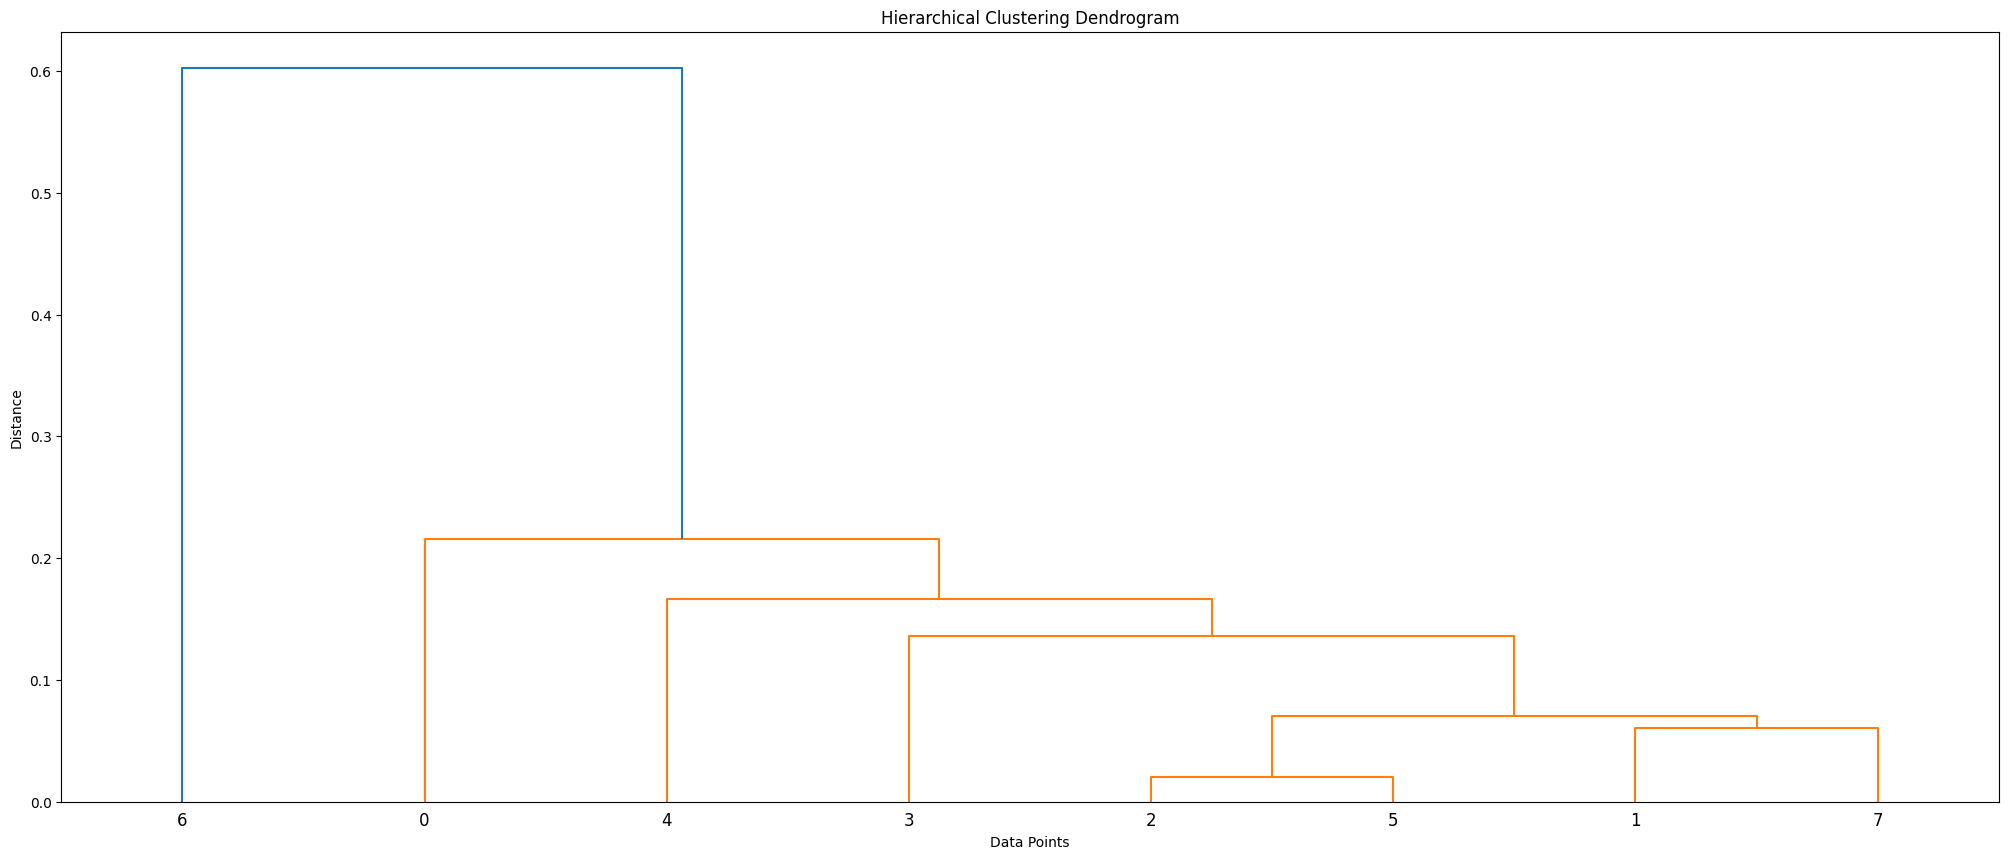

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
dn = dendrogram(linkage(X, 'single'))

<b>Comparison with our implementation:</b> We can clearly see that our implementation give the exact same clusters as the one shown in the dendrogram.


### Exercise
1. According to the dedrogram, which sample is most similar to sample 5?
2. We used the single linkage in our case. Modify the existing code to implement complete linkage.
3. Modify the existing code to implement average-linkage.

### References
- https://github.com/OlaPietka/Agglomerative-Hierarchical-Clustering-from-scratch/tree/main
- https://github.com/Darkprogrammerpb/DeepLearningProjects_when_I_was_a_noob/tree/master/Project40
- https://www.mltut.com/hierarchical-clustering-in-python-step-by-step-complete-guide/